In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Assumption for Linear Regression
1. Linear Data  x increase -> y increase<br>
2. No outlier (homoscedastic)<br>
3. No endogeneity<br>
4. No autocorrelation (n trends like monday sales less friday sales ore)<br>
5. No multicollinearity <br>
x1 related to y , x2 related to y ,if  x1 and x2 are related consider only one variable for prediction. House rice related to area , house price related number of rooms <br>
 Variance Inflation Factor (VIF) to address multicollinearity 
Y = m1x1+m2x2+c


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df= pd.read_csv("Salary_Data.csv")

In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
# store value of YearsExperiences in x and salary in y 

In [9]:
x=df.iloc[: ,0:1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [10]:
y=df.iloc[:,1:].values
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872]])

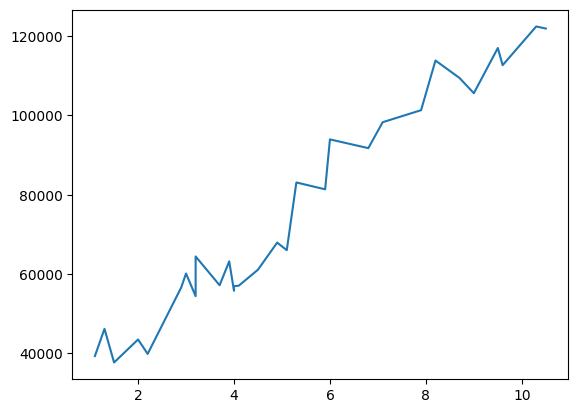

In [11]:
plt.plot(x,y)

In [99]:
# dividing the x and y dataset into 80:20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2)
print("x_train : ",x_train)
print("x_test : ",x_test)
print("y_train : ",y_train)
print("y_test : ",y_test)

x_train :  [[ 8.2]
 [ 2.9]
 [ 4.5]
 [ 2.2]
 [ 4.1]
 [ 1.1]
 [10.5]
 [ 1.5]
 [ 9. ]
 [ 8.7]
 [ 5.1]
 [ 4.9]
 [ 9.5]
 [ 3.7]
 [ 6. ]
 [ 3. ]
 [ 7.9]
 [ 9.6]
 [ 2. ]
 [ 5.3]
 [ 5.9]
 [ 3.9]
 [ 3.2]
 [ 3.2]]
x_test :  [[ 4. ]
 [ 7.1]
 [ 1.3]
 [ 6.8]
 [ 4. ]
 [10.3]]
y_train :  [[113812]
 [ 56642]
 [ 61111]
 [ 39891]
 [ 57081]
 [ 39343]
 [121872]
 [ 37731]
 [105582]
 [109431]
 [ 66029]
 [ 67938]
 [116969]
 [ 57189]
 [ 93940]
 [ 60150]
 [101302]
 [112635]
 [ 43525]
 [ 83088]
 [ 81363]
 [ 63218]
 [ 54445]
 [ 64445]]
y_test :  [[ 56957]
 [ 98273]
 [ 46205]
 [ 91738]
 [ 55794]
 [122391]]


In [100]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [101]:
predicted_salary=lr.predict(x_test)
predicted_salary

array([[ 63555.46219652],
       [ 92938.16495835],
       [ 37964.0759201 ],
       [ 90094.6775943 ],
       [ 63555.46219652],
       [123268.69684152]])

In [102]:
y_test

array([[ 56957],
       [ 98273],
       [ 46205],
       [ 91738],
       [ 55794],
       [122391]])

In [45]:
# finding the difference betwwen original salary and predicted salary


In [103]:
new_df=pd.DataFrame(x_test,columns=['Experience'])
new_df['Salary']=y_test
new_df['predicted_salary']=predicted_salary
new_df['salary_difference']=new_df['Salary']-new_df['predicted_salary']
new_df

,Experience,Salary,predicted_salary,salary_difference
0,4.0,56957,63555.462197,-6598.462197
1,7.1,98273,92938.164958,5334.835042
2,1.3,46205,37964.075920,8240.924080
3,6.8,91738,90094.677594,1643.322406
4,4.0,55794,63555.462197,-7761.462197
5,10.3,122391,123268.696842,-877.696842


In [104]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,predicted_salary)
print(accuracy)

0.9549029668326383


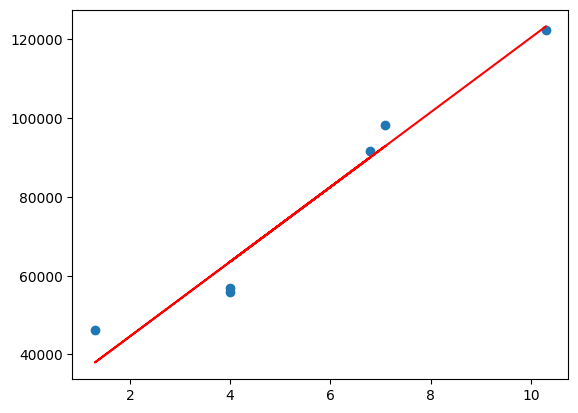

In [105]:
plt.scatter(x_test,y_test)
plt.plot(x_test,predicted_salary,'r')

In [106]:
# y=mx+c
lr.coef_.reshape(1)

array([9478.29121349])

In [107]:
lr.intercept_.shape

(1,)

In [108]:
# verify the coeficient
print(new_df)
new_df['check_Experience']=new_df['Experience']*lr.coef_.reshape(1)+ lr.intercept_
new_df

   Experience  Salary  predicted_salary  salary_difference
0         4.0   56957      63555.462197       -6598.462197
1         7.1   98273      92938.164958        5334.835042
2         1.3   46205      37964.075920        8240.924080
3         6.8   91738      90094.677594        1643.322406
4         4.0   55794      63555.462197       -7761.462197
5        10.3  122391     123268.696842        -877.696842


,Experience,Salary,predicted_salary,salary_difference,check_Experience
0,4.0,56957,63555.462197,-6598.462197,63555.462197
1,7.1,98273,92938.164958,5334.835042,92938.164958
2,1.3,46205,37964.075920,8240.924080,37964.075920
3,6.8,91738,90094.677594,1643.322406,90094.677594
4,4.0,55794,63555.462197,-7761.462197,63555.462197
5,10.3,122391,123268.696842,-877.696842,123268.696842


In [109]:
salary_final_prediction=lr.predict(x)

In [110]:
data

,YearsExperience,Salary,Prediction,Difference
0,1.1,39343,80102.640792,-40759.640792
1,1.3,46205,79886.651144,-33681.651144
2,1.5,37731,79670.661496,-41939.661496
3,2.0,43525,79130.687375,-35605.687375
4,2.2,39891,78914.697727,-39023.697727
5,2.9,56642,78158.733958,-21516.733958
6,3.0,60150,78050.739134,-17900.739134
7,3.2,54445,77834.749485,-23389.749485
8,3.2,64445,77834.749485,-13389.749485
9,3.7,57189,77294.775365,-20105.775365


In [111]:
data['Prediction']=salary_final_prediction
data['Difference']=data['Salary']-data['Prediction']
data

,YearsExperience,Salary,Prediction,Difference
0,1.1,39343,36068.417677,3274.582323
1,1.3,46205,37964.075920,8240.924080
2,1.5,37731,39859.734163,-2128.734163
3,2.0,43525,44598.879770,-1073.879770
4,2.2,39891,46494.538012,-6603.538012
5,2.9,56642,53129.341862,3512.658138
6,3.0,60150,54077.170983,6072.829017
7,3.2,54445,55972.829226,-1527.829226
8,3.2,64445,55972.829226,8472.170774
9,3.7,57189,60711.974832,-3522.974832


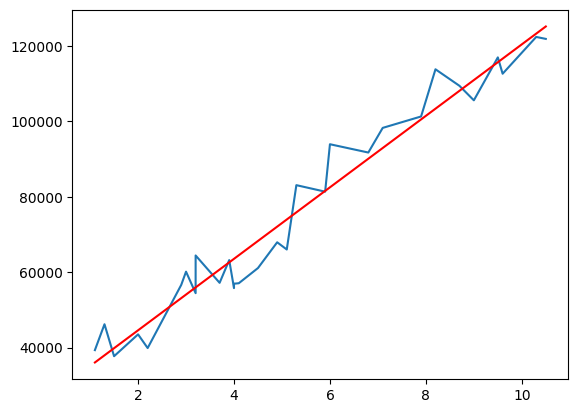

In [112]:
plt.plot(x,y)
plt.plot(x,salary_final_prediction,'r')

In [113]:
r2_score(y,salary_final_prediction)

0.956948063759511